In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
#load model
model= tf.keras.models.load_model('./model/object_detection.h5')
print("model loaded successfully")

model loaded successfully


In [4]:
path='./data_images/test/N78.jpeg'
image=load_img(path)
image= np.array(image,dtype=np.uint8) #8 bit array (0 to 255)
image1=load_img(path,target_size=(224,224))
img_arr_224= img_to_array(image1)/255.0  #convert into arrray and normalized

In [5]:
#size of original image
h,w,d= image.shape
print("height of image =",h)
print("wdth of image= ",w)

height of image = 247
wdth of image=  397


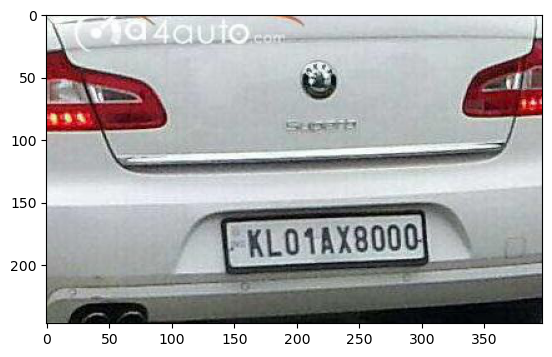

In [6]:
plt.imshow(image)
plt.show()


In [7]:
img_arr_224.shape

(224, 224, 3)

In [8]:
test_arr= img_arr_224.reshape((1,224,224,3))

In [9]:
test_arr.shape

(1, 224, 224, 3)

In [10]:
#make prediction
coord= model.predict(test_arr)
coord

1/1 [==============================] - 7s 7s/step


array([[0.30897623, 0.7510405 , 0.75627524, 0.6492154 ]], dtype=float32)

In [11]:
#denormalize
denorm=np.array([w,w,h,h])
coord=coord * denorm
coord

array([[122.6635645 , 298.16308576, 186.79998344, 160.35620385]])

In [12]:
coord= coord.astype(np.int32)
coord

array([[122, 298, 186, 160]])

In [13]:
#bounding box on the image

xmin,xmax,ymin,ymax= coord[0]
pt1= (xmin,ymin)
pt2= (xmax,ymax)
pt1, pt2

((122, 186), (298, 160))

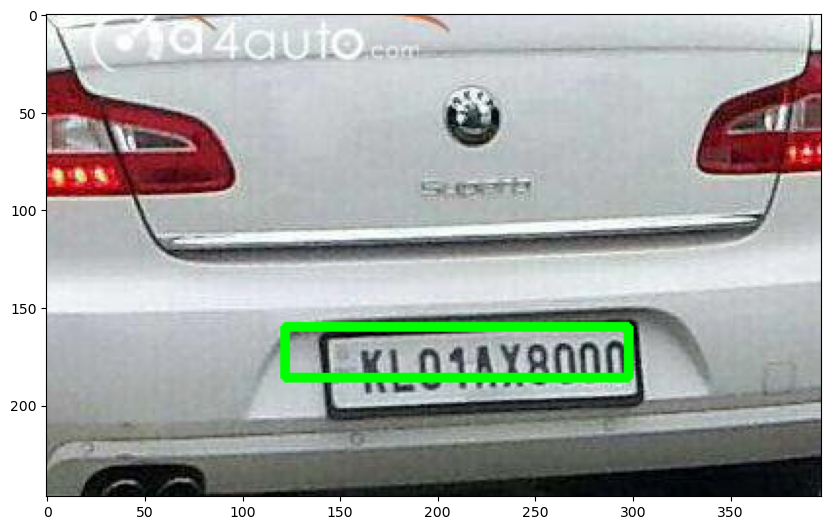

In [14]:
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
plt.figure(figsize= (10,8))
plt.imshow(image)
plt.show()

In [15]:
#creating pipeline model
def obj_detection(path):
    image=load_img(path)
    image= np.array(image,dtype=np.uint8) #8 bot array (0 to 255)
    image1=load_img(path,target_size=(224,224))
    img_arr_224= img_to_array(image1)/255.0  #convert into arrray and normalized
    h,w,d= image.shape
    #data preprocessing
    test_arr= img_arr_224.reshape((1,224,224,3))
    coord= model.predict(test_arr)
    denorm=np.array([w,w,h,h])
    coord=coord * denorm
    coord= coord.astype(np.int32)
    #bounding box on the image

    xmin,xmax,ymin,ymax= coord[0]
    pt1= (xmin,ymin)
    pt2= (xmax,ymax)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image,coord


    
    
    
    
    
    

1/1 [==============================] - 0s 253ms/step
[[355 807 437 279]]


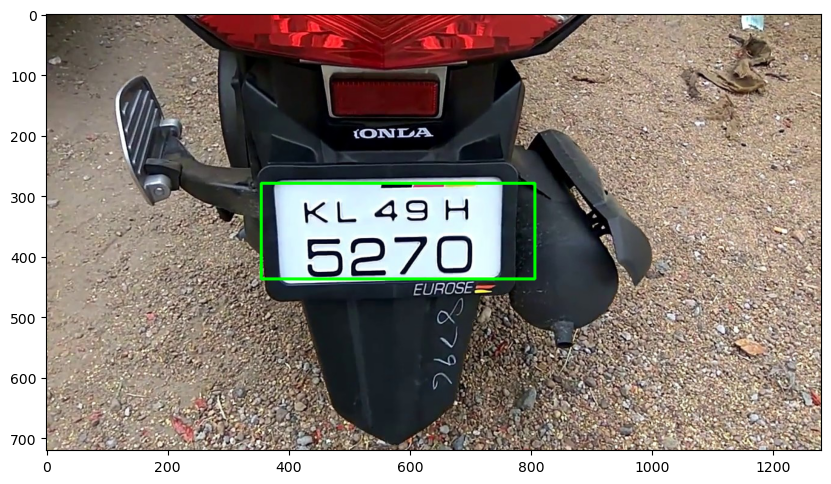

In [16]:
path='./data_images/test/N93.jpeg'
image,coord= obj_detection(path)
print(coord)
plt.figure(figsize= (10,8))
plt.imshow(image)
plt.show()
